In [2]:
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import numpy as np 

from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.io
from scipy.io import loadmat
import pandas as pd

import matplotlib.style as style 
from matplotlib.offsetbox import AnchoredText

from scipy.spatial.distance import cdist,mahalanobis
from scipy.stats import wasserstein_distance, pearsonr, entropy
from scipy.signal import correlate, correlation_lags
from tqdm.notebook import tqdm

import imp
import time
from timeit import default_timer as timer
import matplotlib.patches as patches
import pickle as pickle
import os


#get_ipython().run_line_magic('matplotlib', 'inline')
#get_ipython().run_line_magic('autosave', '5')
sns.set(style = 'whitegrid', context='poster', rc={"lines.linewidth": 2.5})
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
mpl.rcParams['font.family'] = "sans-serif"
import matplotlib.patches as patches
#mpl.use('Agg')


%matplotlib inline 
%autosave 5
import context_helper

from context_helper import folders

Autosaving every 5 seconds


In [3]:
%matplotlib inline

In [4]:
style.use('ggplot')

In [6]:
#pod_name='monkey'
#model='GPT2'
model='GPT2'

home_dir = folders['tiger']
save_plot='N'
results_dir= home_dir + 'results/'
log_dir = home_dir + 'logs/'

In [8]:
def plot_betas(betas,betas_perm_all,analyses_str, nfeat):
    win=nfeat
    f,ax = plt.subplots(1,1, figsize=(10,5))
    plt.title('Betas: %s, NFeature =%i' %(analyses_str, nfeat), fontsize=12)
    bperm=np.array(betas_perm_all)
    bperm_mean=np.mean(bperm, axis=1)
    sns.violinplot(data=bperm_mean,color='grey', inner=None,  alpha=0.1,cut =0, edgecolor="white", linewidth=0, ax=ax)
    betas_mean=np.mean(betas,axis=0)
    sns.lineplot(data=betas_mean, color='black',ax = ax)
    xtick_loc=np.arange(0,win+1,10)
    xlab=[i for i in np.arange(0,win+1,10)]
    ax.set_xticks(xtick_loc)
    
    ax.set_xticklabels(xlab)
    plt.xticks(rotation=90)
    plt.savefig(results_dir +'%s_betas_%i.png' % (analyses_str, nfeat), bbox_inches='tight')

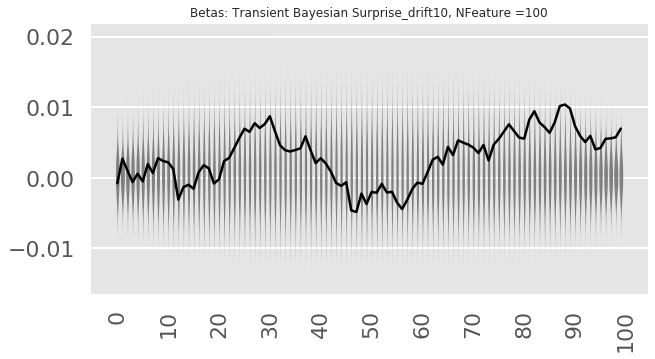

In [9]:
plot_betas(data['betas'],data['betas_perm_all'],'Transient Bayesian Surprise_drift10', nFeat)